# TRABAJO FINAL DE GRADO - PEC 2
###### Autor: Claudia Reina Fajardo
###### Octubre 2021

## Modelo de aprendizaje supervisado: Árbol de decisión

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from IPython.display import Image as PImage
from PIL import Image, ImageDraw, ImageFont
!pip install graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# cargamos el dataset
df = pd.read_csv('data.csv')

### Clases

Antes de empezar a construir modelos de aprendizaje, hay que definir cuales serán nuestras clases a modo de indicador de existencia o ausencia de problemas mentales.

Tenemos las siguientes categorías candidatas:

* depressed: que indica con qué frecuencia el participante se siente deprimido
* sleep: que indica con qué frecuencia el participante tienen problemas de insomnio
* yourself: que indica con qué frecuencia el participante siente problemas de aceptación (autoestima)
* dead: que indica con qué frecuencia el participante piensa en morir
* profMental: que indica si el participante ha necesitado ayuda profesional en temas de salud mental

Todas tienen el siguiente patrón:

* 0.0 --> no
* 1.0 --> yes
* 7.0 --> refused
* 9.0 --> dk (don't know)

Finalmente se pueden separar aquellas observaciones categorizadas como 7 y 9 para probar el modelo.

Observaremos cómo estan repartidas las categorías.

In [3]:
# balance de depressed
df.groupby('depressed').size()

depressed
0.0    3780
1.0    1216
7.0       1
9.0       3
dtype: int64

In [4]:
# balance de sleep
df.groupby('sleep').size()

sleep
0.0    3164
1.0    1835
7.0       1
dtype: int64

In [5]:
# balance de yourself
df.groupby('yourself').size()

yourself
0.0    4129
1.0     869
9.0       2
dtype: int64

In [6]:
# balance de dead
df.groupby('dead').size()

dead
0.0    4829
1.0     169
7.0       1
9.0       1
dtype: int64

In [7]:
# balance de profMental
df.groupby('profMental').size()

profMental
0.0    4577
1.0     420
9.0       3
dtype: int64

Como vemos, todas las clases están desbalanceadas siendo mucha la diferencia que hay entre la categoría negativa y la positiva.

### Árbol de clasificación sobre depresión

Para crear un árbol de clasificación sobre la depresión seguiremos los siguientes pasos:
* Eliminar las observaciones que no estén dentro de la binaridad, ya que no aportan nada al modelo
* Eliminar todos los factores clasificatorios
* Comprobar la precisión entre las profundidades 1 y 4 (realmente a mayor profundidad mayor precisión, pero el árbol se hace más difícil de entender.
* Elegir la mejor precisión
* Mostrar el árbol
* Probar precisión con los demás factores clasificatorios, si es mejor que la anterior mostrar el árbol.

In [8]:
# Eliminación de elemenos clasificados como 7 y 9
data=df[df.depressed<2]

# Estudio de la profundidad con mejor precisión para la depresión
y_train = data['depressed']
x_train = data.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).values 

# Probamos las precisiones con varias profundidades
for i in range(4):
    i+=1
    decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = i, criterion="entropy").fit(x_train, y_train)
    decision_tree.fit(x_train, y_train)
        
    print ("Precisión profundidad "+str(i)+" : "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión profundidad 1 : 80.32 %
Precisión profundidad 2 : 81.63 %
Precisión profundidad 3 : 81.89 %
Precisión profundidad 4 : 82.95 %


In [9]:
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
        
print ("Precisión del árbol de clasificación: "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión del árbol de clasificación: 82.95 %


In [10]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(decision_tree,
                           feature_names=df.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).columns)

graph=graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

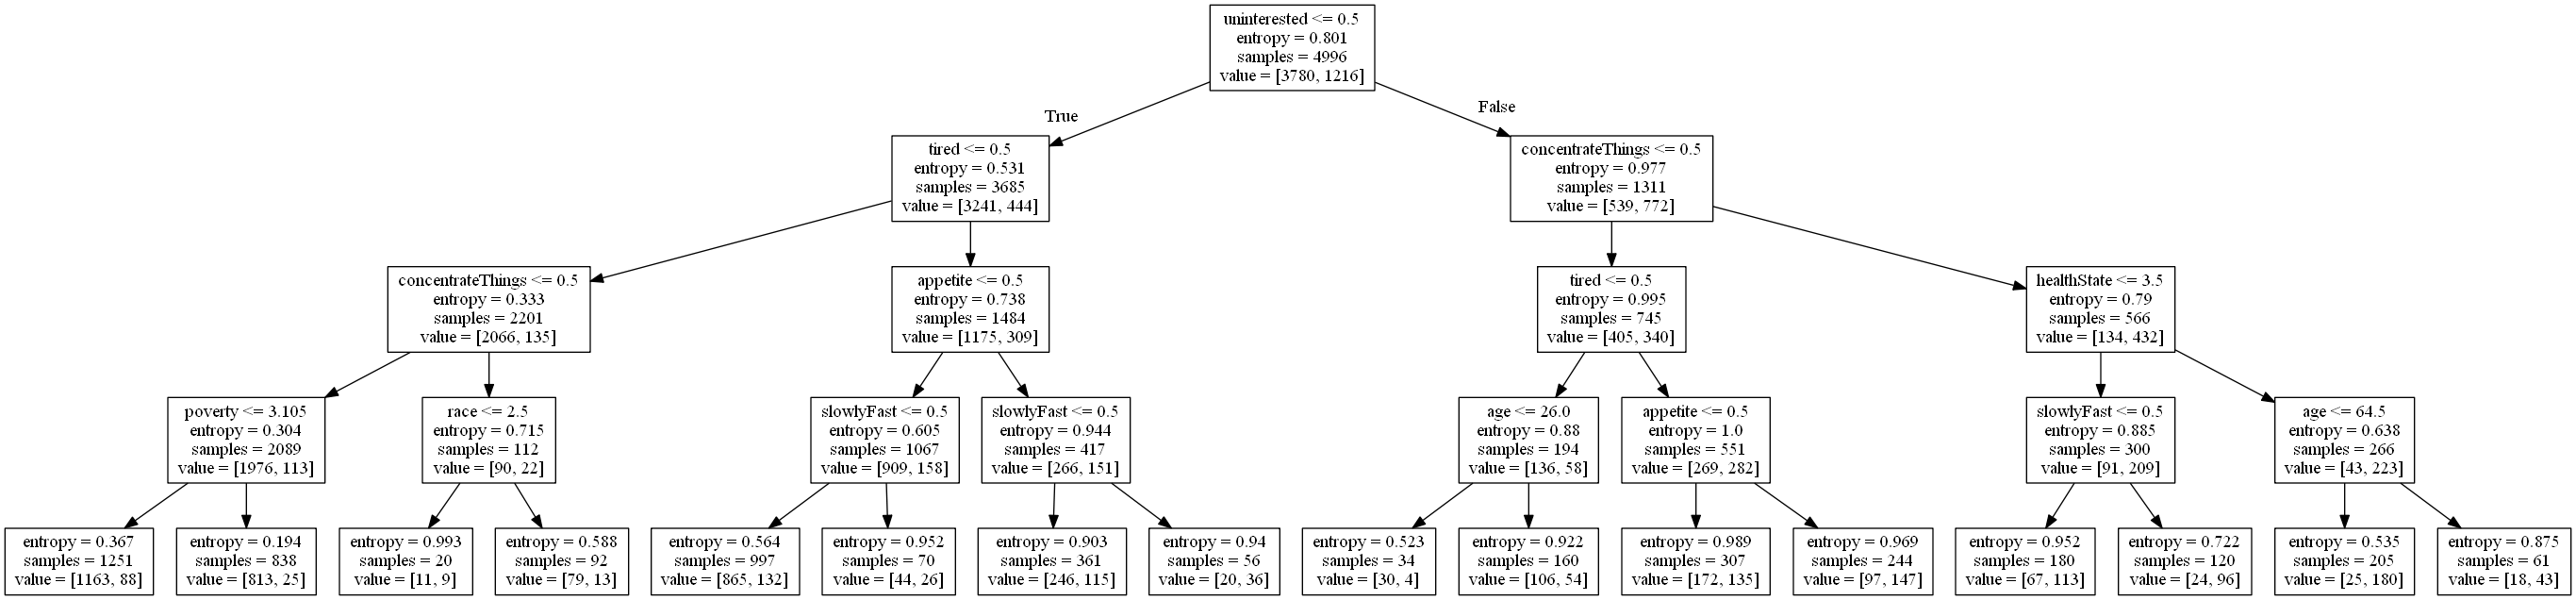

In [12]:
Image.open('tree.png','r')

In [13]:
y_train = data['depressed']
x_train = data.drop(['depressed'], axis=1).values 
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
        
print ("Precisión del árbol de clasificación: "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión del árbol de clasificación: 85.47 %


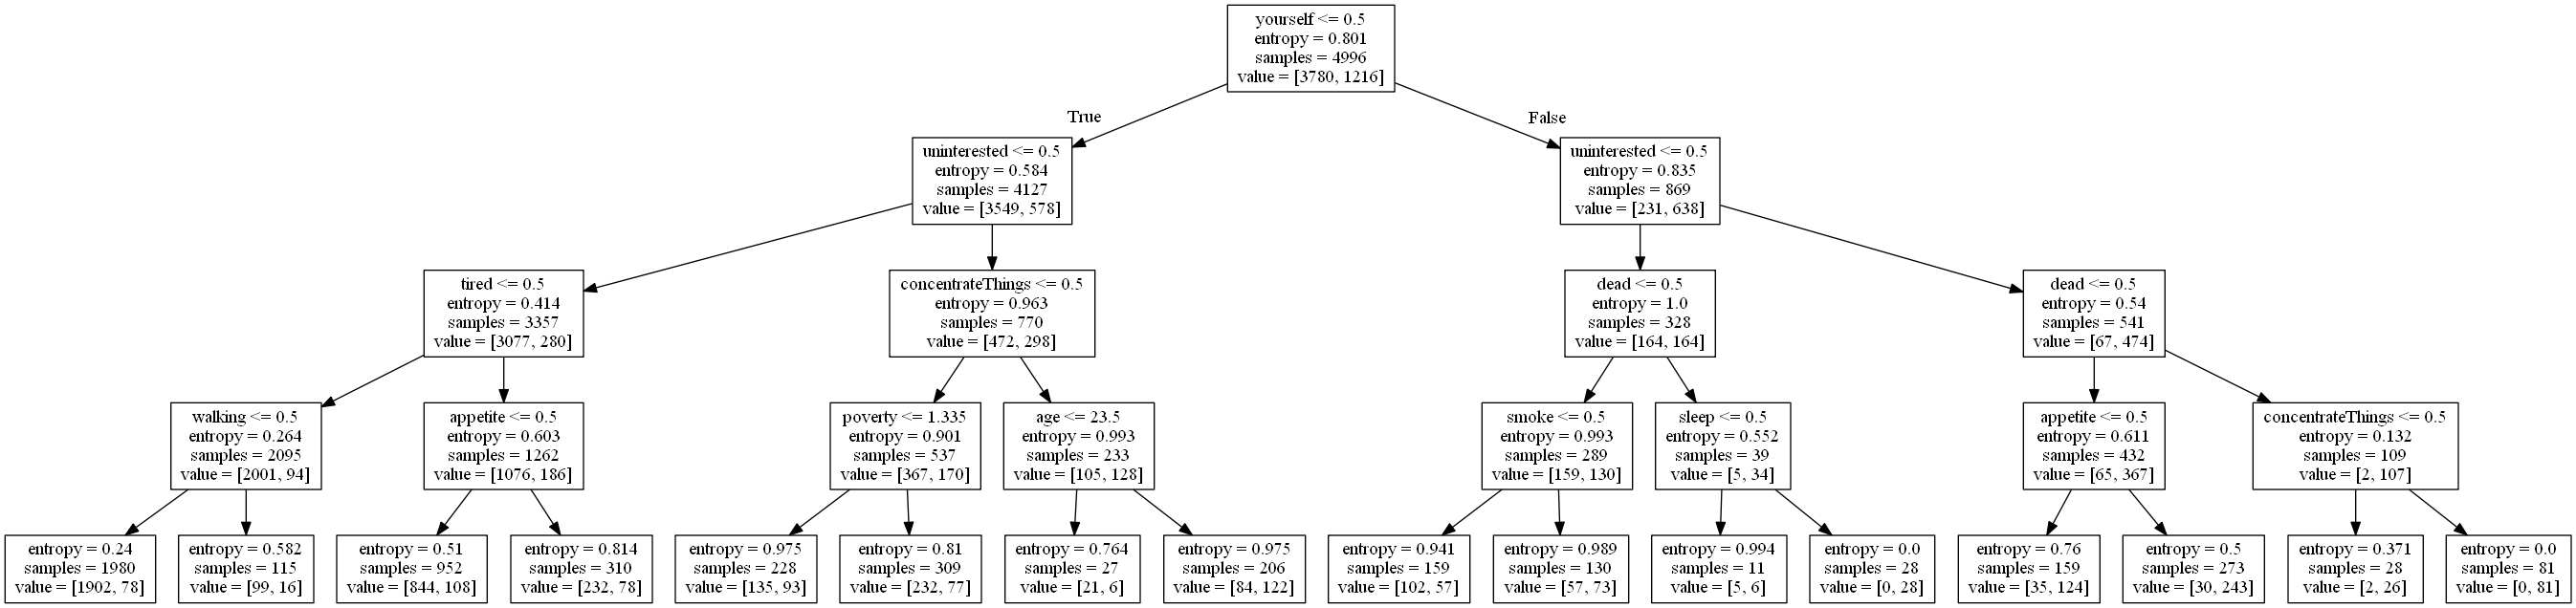

In [14]:
dot_data = export_graphviz(decision_tree,
                           feature_names=df.drop(['depressed'], axis=1).columns)

graph=graph_from_dot_data(dot_data)
graph.write_png('tree1.png')
Image.open('tree1.png','r')

### Árbol de clasificación sobre ideas de muerte

Repetimos el mismo proceso que hicimos con la depresión:

In [15]:
# Eliminación de elemenos clasificados como 7 y 9
data=df[df.dead<2]

# Estudio de la profundidad con mejor precisión para ideas de suicidio
y_train = data['dead']
x_train = data.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).values 

# Probamos las precisiones con varias profundidades
for i in range(4):
    i+=1
    decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = i, criterion="entropy").fit(x_train, y_train)
    decision_tree.fit(x_train, y_train)
        
    print ("Precisión profundidad "+str(i)+" : "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión profundidad 1 : 96.62 %
Precisión profundidad 2 : 96.62 %
Precisión profundidad 3 : 96.62 %
Precisión profundidad 4 : 96.68 %


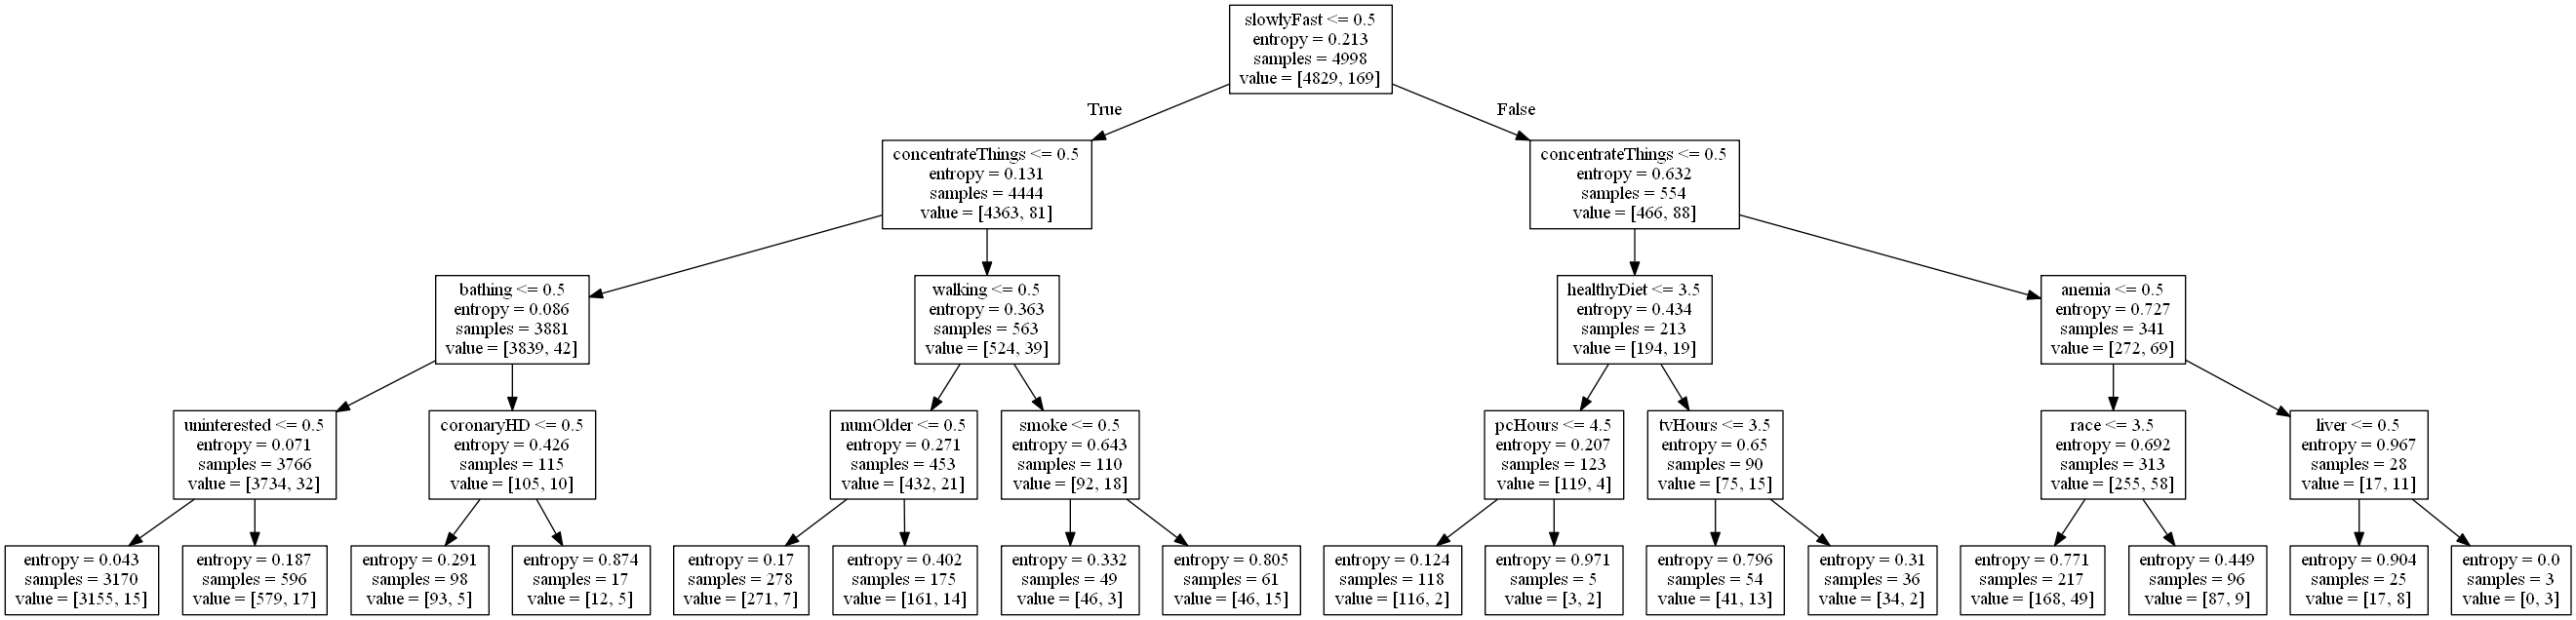

In [16]:
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
        
dot_data = export_graphviz(decision_tree,
                           feature_names=df.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).columns)

graph=graph_from_dot_data(dot_data)
graph.write_png('tree_d.png')
Image.open('tree_d.png','r')

In [17]:
y_train = data['dead']
x_train = data.drop(['dead'], axis=1).values 
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
print ("Precisión del árbol de clasificación: "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión del árbol de clasificación: 96.62 %


### Árbol de clasificación sobre insomnio

In [22]:
# Eliminación de elemenos clasificados como 7 y 9
data=df[df.sleep<2]

# Estudio de la profundidad con mejor precisión para el insomnio
y_train = data['sleep']
x_train = data.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).values 

# Probamos las precisiones con varias profundidades
for i in range(4):
    i+=1
    decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = i, criterion="entropy").fit(x_train, y_train)
    decision_tree.fit(x_train, y_train)
        
    print ("Precisión profundidad "+str(i)+" : "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión profundidad 1 : 69.43 %
Precisión profundidad 2 : 71.43 %
Precisión profundidad 3 : 72.69 %
Precisión profundidad 4 : 73.79 %


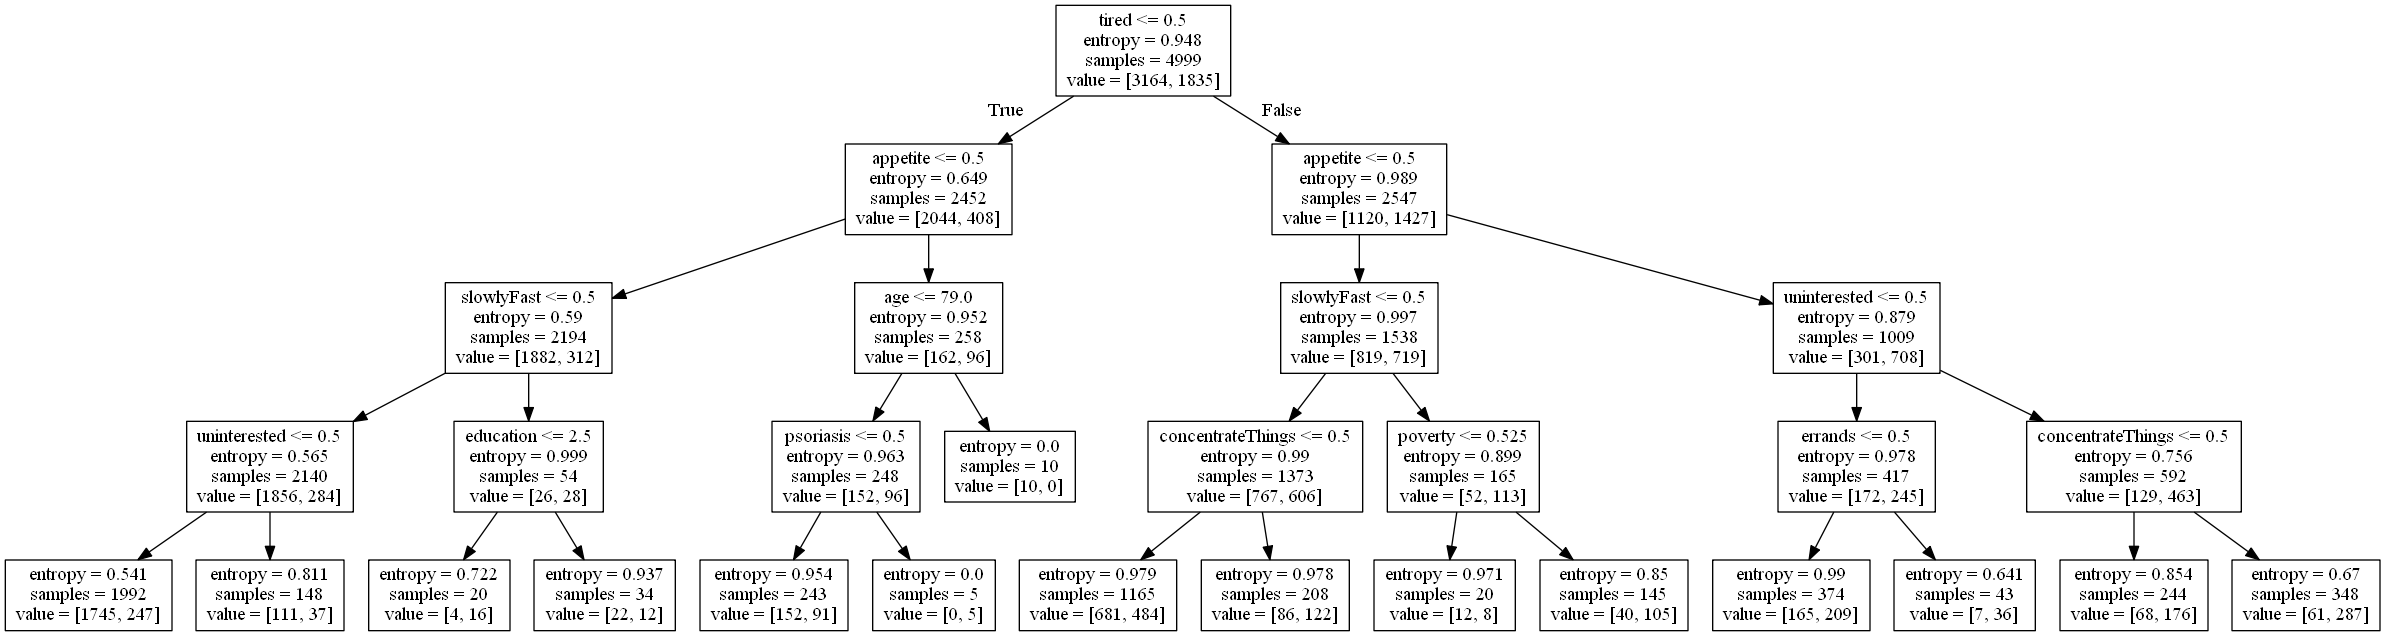

In [23]:
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
        
dot_data = export_graphviz(decision_tree,
                           feature_names=df.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).columns)

graph=graph_from_dot_data(dot_data)
graph.write_png('tree_s.png')
Image.open('tree_s.png','r')

In [24]:
y_train = data['sleep']
x_train = data.drop(['sleep'], axis=1).values 
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
print ("Precisión del árbol de clasificación: "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión del árbol de clasificación: 73.83 %


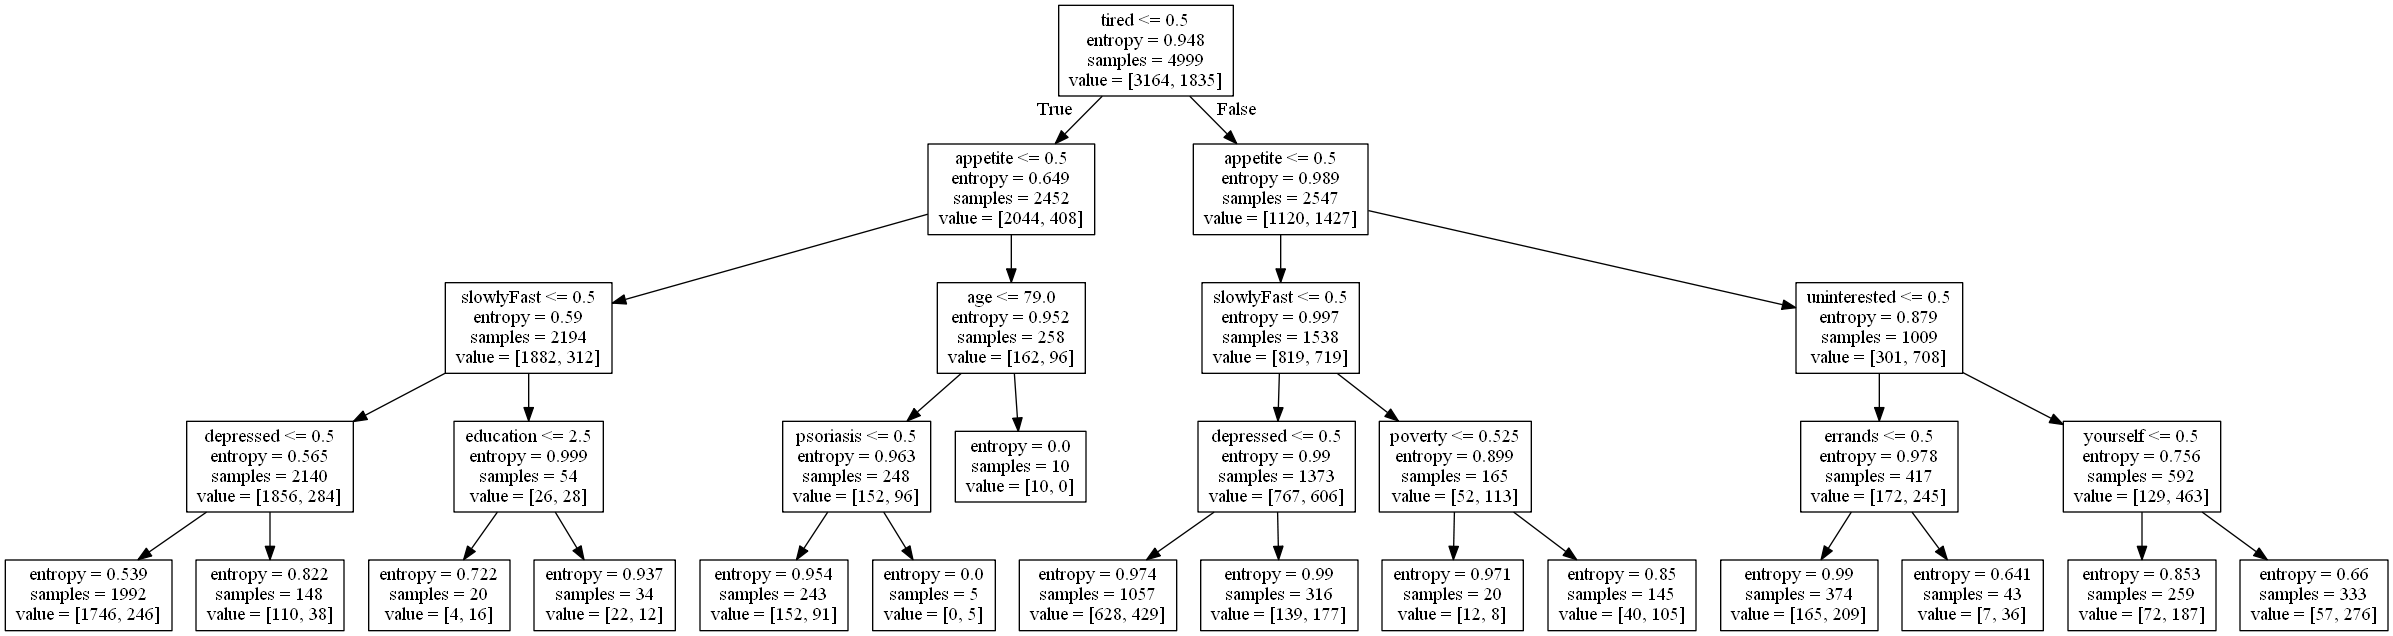

In [25]:
dot_data = export_graphviz(decision_tree,
                           feature_names=df.drop(['sleep'], axis=1).columns)

graph=graph_from_dot_data(dot_data)
graph.write_png('tree_s1.png')
Image.open('tree_s1.png','r')

### Árbol de clasificación sobre problemas de autoestima

In [26]:
# Eliminación de elemenos clasificados como 7 y 9
data=df[df.yourself<2]

# Estudio de la profundidad con mejor precisión para autoestima
y_train = data['yourself']
x_train = data.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).values 

# Probamos las precisiones con varias profundidades
for i in range(4):
    i+=1
    decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = i, criterion="entropy").fit(x_train, y_train)
    decision_tree.fit(x_train, y_train)
        
    print ("Precisión profundidad "+str(i)+" : "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión profundidad 1 : 82.61 %
Precisión profundidad 2 : 84.59 %
Precisión profundidad 3 : 85.01 %
Precisión profundidad 4 : 85.71 %


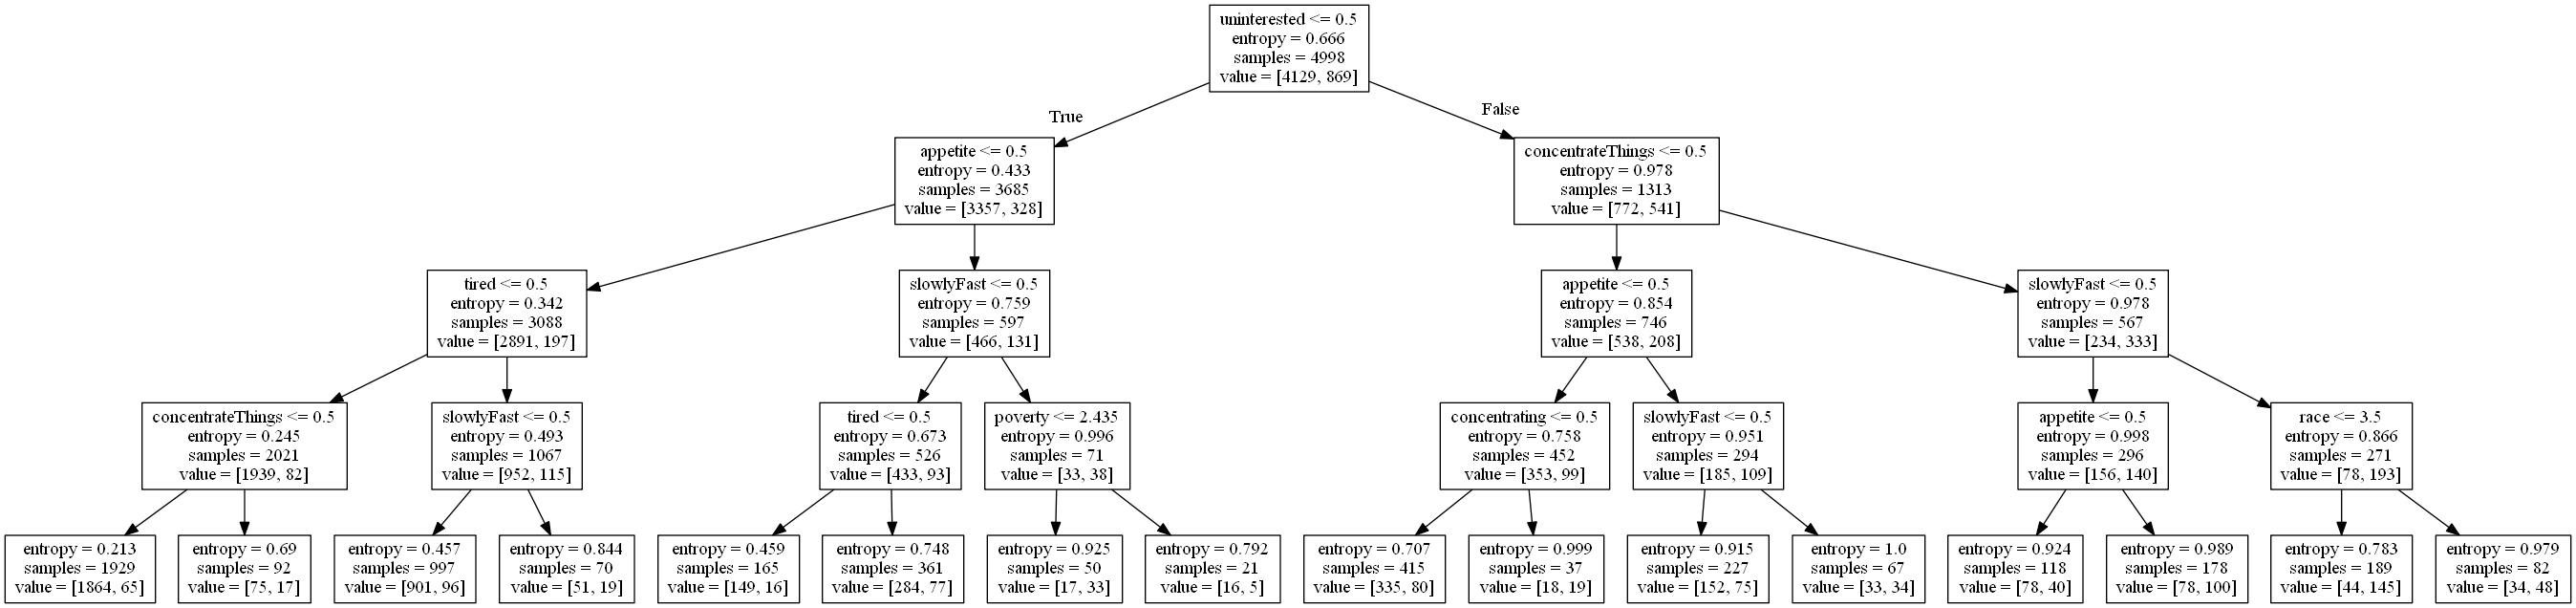

In [27]:
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
        
dot_data = export_graphviz(decision_tree,
                           feature_names=df.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).columns)

graph=graph_from_dot_data(dot_data)
graph.write_png('tree_y.png')
Image.open('tree_y.png','r')

In [28]:
y_train = data['yourself']
x_train = data.drop(['yourself'], axis=1).values 
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
print ("Precisión del árbol de clasificación: "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión del árbol de clasificación: 87.19 %


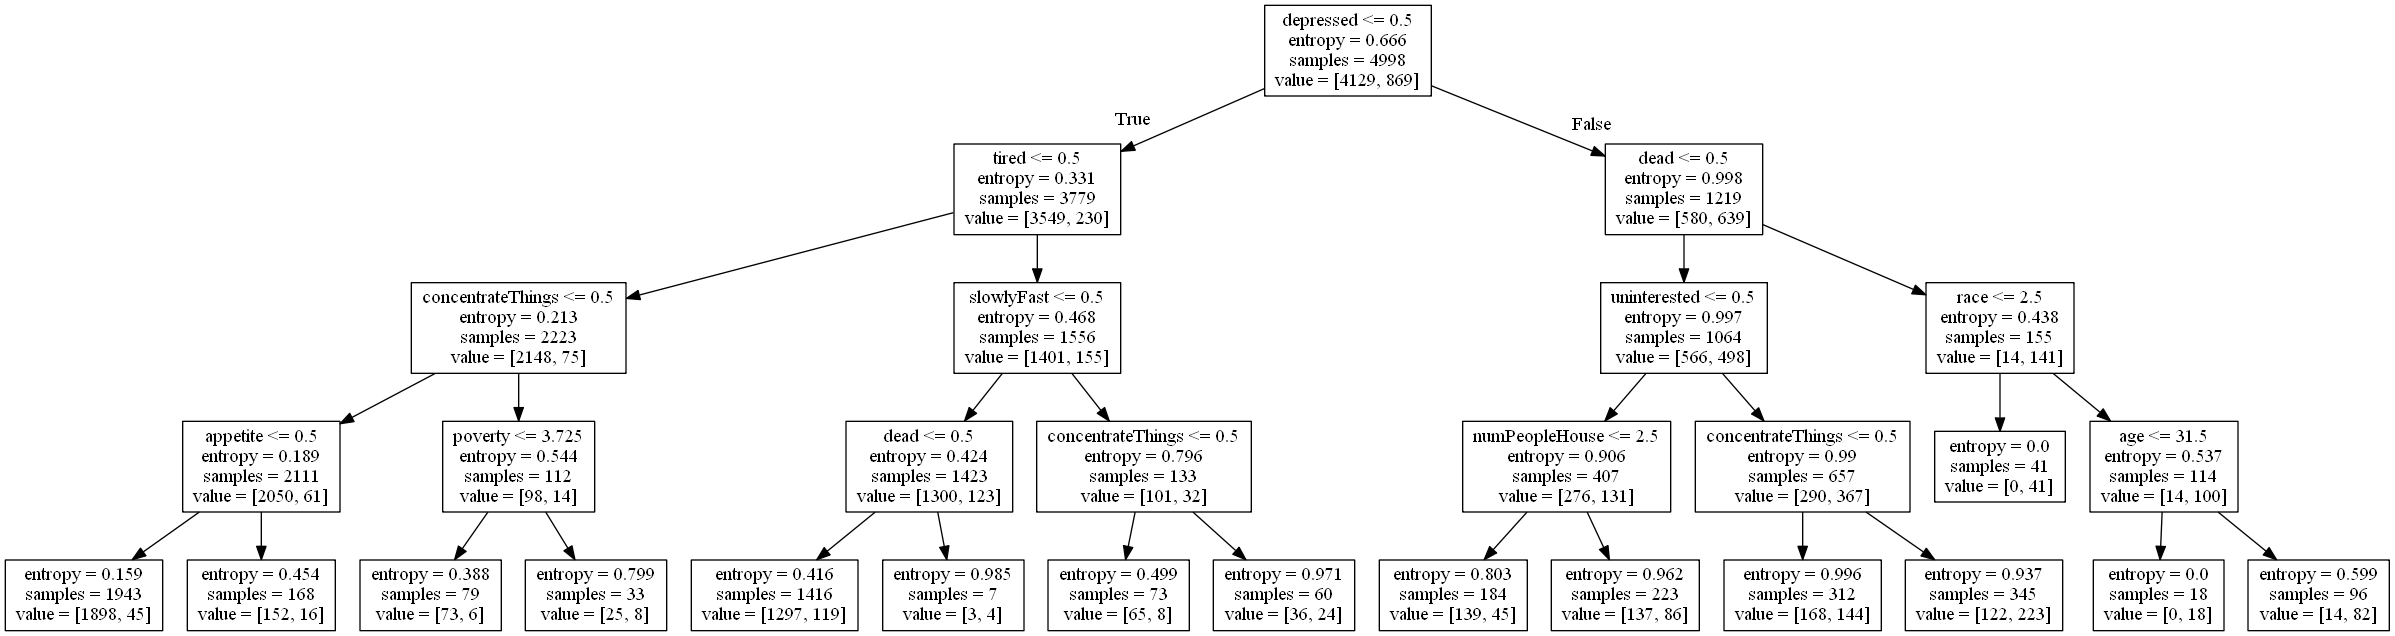

In [29]:
dot_data = export_graphviz(decision_tree,
                           feature_names=df.drop(['yourself'], axis=1).columns)

graph=graph_from_dot_data(dot_data)
graph.write_png('tree_y1.png')
Image.open('tree_y1.png','r')

### Árbol de clasificación sobre visitarse con un profesional de la salud mental

In [30]:
# Eliminación de elemenos clasificados como 7 y 9
data=df[df.profMental<2]

# Estudio de la profundidad con mejor precisión para autoestima
y_train = data['profMental']
x_train = data.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).values 

# Probamos las precisiones con varias profundidades
for i in range(4):
    i+=1
    decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = i, criterion="entropy").fit(x_train, y_train)
    decision_tree.fit(x_train, y_train)
        
    print ("Precisión profundidad "+str(i)+" : "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión profundidad 1 : 91.59 %
Precisión profundidad 2 : 91.59 %
Precisión profundidad 3 : 91.86 %
Precisión profundidad 4 : 92.04 %


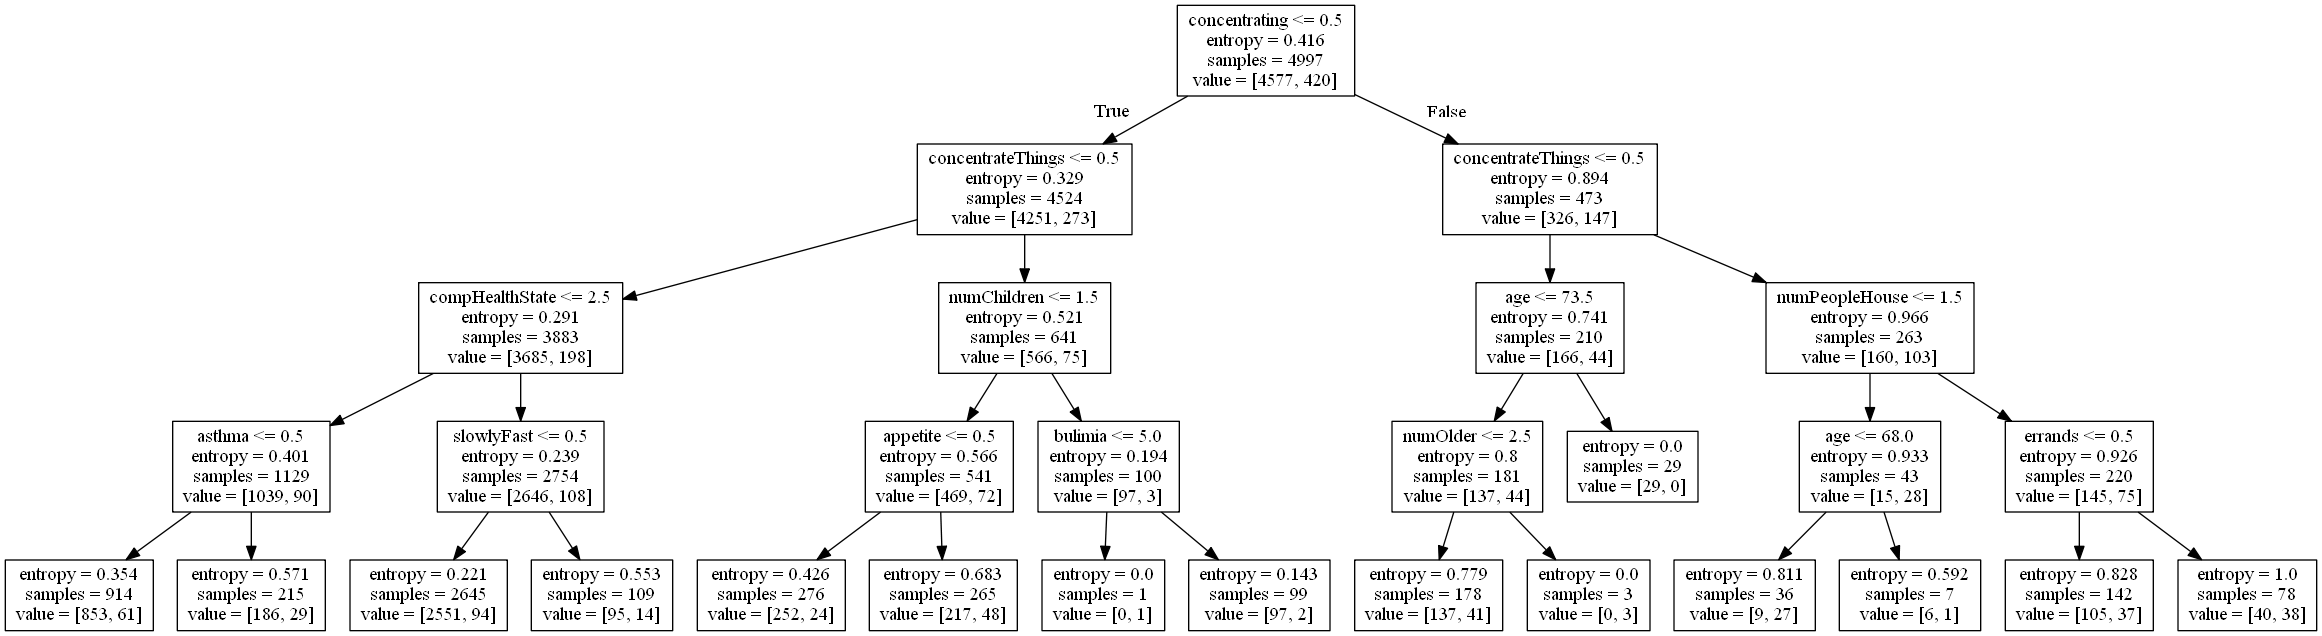

In [31]:
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
        
dot_data = export_graphviz(decision_tree,
                           feature_names=df.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).columns)

graph=graph_from_dot_data(dot_data)
graph.write_png('tree_p.png')
Image.open('tree_p.png','r')

In [32]:
y_train = data['profMental']
x_train = data.drop(['profMental'], axis=1).values 
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
print ("Precisión del árbol de clasificación: "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión del árbol de clasificación: 92.02 %


## Modelo de aprendizaje supervisado: K-NN

### KNN sobre depresión

In [33]:
# plantamos semilla para que nos de el mismo resultado en las diferentes ejecuciones
np.random.seed(0)

# Eliminación de elemenos clasificados como 7 y 9
data=df[df.depressed<2]

# Separación de conjunto y clase para cálculo de resultados
X=data.drop(['depressed'], axis=1)
y=data.depressed.values

# abreviación para usar knn
knn = KNeighborsClassifier()
# rango de valores de vecinos que usaremos en el test
rango = {'n_neighbors': np.arange(1, 25)}
# probaremos cada knn para un cross-validation de 10
knn_gscv = GridSearchCV(knn, rango, cv=10)
# entrenamos el modelo
knn_gscv.fit(X, y)
# comprobamos qué cantidad de vecinos da mejor resultado
print("Número de vecinos con mejores resultados: "+str(knn_gscv.best_params_))
# vemos el porcentaje de aciertos que ha tenido
print("Mejor precisión obtenida: "+str(knn_gscv.best_score_))


Número de vecinos con mejores resultados: {'n_neighbors': 9}
Mejor precisión obtenida: 0.7662192384769538


### KNN sobre ideas de muerte

In [34]:
# plantamos semilla para que nos de el mismo resultado en las diferentes ejecuciones
np.random.seed(0)

# Eliminación de elemenos clasificados como 7 y 9
data=df[df.dead<2]

# Separación de conjunto y clase para cálculo de resultados
X=data.drop(['dead'], axis=1)
y=data.dead.values

# abreviación para usar knn
knn = KNeighborsClassifier()
# rango de valores de vecinos que usaremos en el test
rango = {'n_neighbors': np.arange(1, 25)}
# probaremos cada knn para un cross-validation de 10
knn_gscv = GridSearchCV(knn, rango, cv=10)
# entrenamos el modelo
knn_gscv.fit(X, y)
# comprobamos qué cantidad de vecinos da mejor resultado
print("Número de vecinos con mejores resultados: "+str(knn_gscv.best_params_))
# vemos el porcentaje de aciertos que ha tenido
print("Mejor precisión obtenida: "+str(knn_gscv.best_score_))

Número de vecinos con mejores resultados: {'n_neighbors': 6}
Mejor precisión obtenida: 0.9661867735470941


### KNN sobre insomnio

In [35]:
# plantamos semilla para que nos de el mismo resultado en las diferentes ejecuciones
np.random.seed(0)

# Eliminación de elemenos clasificados como 7 y 9
data=df[df.sleep<2]

# Separación de conjunto y clase para cálculo de resultados
X=data.drop(['sleep'], axis=1)
y=data.sleep.values

# abreviación para usar knn
knn = KNeighborsClassifier()
# rango de valores de vecinos que usaremos en el test
rango = {'n_neighbors': np.arange(1, 25)}
# probaremos cada knn para un cross-validation de 10
knn_gscv = GridSearchCV(knn, rango, cv=10)
# entrenamos el modelo
knn_gscv.fit(X, y)
# comprobamos qué cantidad de vecinos da mejor resultado
print("Número de vecinos con mejores resultados: "+str(knn_gscv.best_params_))
# vemos el porcentaje de aciertos que ha tenido
print("Mejor precisión obtenida: "+str(knn_gscv.best_score_))

Número de vecinos con mejores resultados: {'n_neighbors': 20}
Mejor precisión obtenida: 0.6479270541082165


### KNN sobre autoestima

In [36]:
# plantamos semilla para que nos de el mismo resultado en las diferentes ejecuciones
np.random.seed(0)

# Eliminación de elemenos clasificados como 7 y 9
data=df[df.yourself<2]

# Separación de conjunto y clase para cálculo de resultados
X=data.drop(['yourself'], axis=1)
y=data.yourself.values

# abreviación para usar knn
knn = KNeighborsClassifier()
# rango de valores de vecinos que usaremos en el test
rango = {'n_neighbors': np.arange(1, 25)}
# probaremos cada knn para un cross-validation de 10
knn_gscv = GridSearchCV(knn, rango, cv=10)
# entrenamos el modelo
knn_gscv.fit(X, y)
# comprobamos qué cantidad de vecinos da mejor resultado
print("Número de vecinos con mejores resultados: "+str(knn_gscv.best_params_))
# vemos el porcentaje de aciertos que ha tenido
print("Mejor precisión obtenida: "+str(knn_gscv.best_score_))

Número de vecinos con mejores resultados: {'n_neighbors': 13}
Mejor precisión obtenida: 0.8271318637274548


### KNN sobre visitas en salud mental

In [37]:
# plantamos semilla para que nos de el mismo resultado en las diferentes ejecuciones
np.random.seed(0)

# Eliminación de elemenos clasificados como 7 y 9
data=df[df.profMental<2]

# Separación de conjunto y clase para cálculo de resultados
X=data.drop(['profMental'], axis=1)
y=data.profMental.values

# abreviación para usar knn
knn = KNeighborsClassifier()
# rango de valores de vecinos que usaremos en el test
rango = {'n_neighbors': np.arange(1, 25)}
# probaremos cada knn para un cross-validation de 10
knn_gscv = GridSearchCV(knn, rango, cv=10)
# entrenamos el modelo
knn_gscv.fit(X, y)
# comprobamos qué cantidad de vecinos da mejor resultado
print("Número de vecinos con mejores resultados: "+str(knn_gscv.best_params_))
# vemos el porcentaje de aciertos que ha tenido
print("Mejor precisión obtenida: "+str(knn_gscv.best_score_))

Número de vecinos con mejores resultados: {'n_neighbors': 12}
Mejor precisión obtenida: 0.9159494989979959
